# Soccer Data
## 25k+ matches, players & teams attributes for European Professional Football

This is a data set from a Kaggle competition https://www.kaggle.com/hugomathien/soccer/data

We use the command line tool to list the tables in this database

In [4]:
%%sh
sqlite3 data/database.sqlite '.tables' | tr ' ' '\n' | grep -v -e "^$"

Country
Match
Player_Attributes
Team_Attributes
League
Player
Team


In [12]:
%%sh
sqlite3 data/database.sqlite '.schema Player'

CREATE TABLE `Player` (
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,
	`player_api_id`	INTEGER UNIQUE,
	`player_name`	TEXT,
	`player_fifa_api_id`	INTEGER UNIQUE,
	`birthday`	TEXT,
	`height`	INTEGER,
	`weight`	INTEGER
);


In [11]:
%%sh
sqlite3 data/database.sqlite '.schema Player_Attributes'

CREATE TABLE IF NOT EXISTS "Player_Attributes" (
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,
	`player_fifa_api_id`	INTEGER,
	`player_api_id`	INTEGER,
	`date`	TEXT,
	`overall_rating`	INTEGER,
	`potential`	INTEGER,
	`preferred_foot`	TEXT,
	`attacking_work_rate`	TEXT,
	`defensive_work_rate`	TEXT,
	`crossing`	INTEGER,
	`finishing`	INTEGER,
	`heading_accuracy`	INTEGER,
	`short_passing`	INTEGER,
	`volleys`	INTEGER,
	`dribbling`	INTEGER,
	`curve`	INTEGER,
	`free_kick_accuracy`	INTEGER,
	`long_passing`	INTEGER,
	`ball_control`	INTEGER,
	`acceleration`	INTEGER,
	`sprint_speed`	INTEGER,
	`agility`	INTEGER,
	`reactions`	INTEGER,
	`balance`	INTEGER,
	`shot_power`	INTEGER,
	`jumping`	INTEGER,
	`stamina`	INTEGER,
	`strength`	INTEGER,
	`long_shots`	INTEGER,
	`aggression`	INTEGER,
	`interceptions`	INTEGER,
	`positioning`	INTEGER,
	`vision`	INTEGER,
	`penalties`	INTEGER,
	`marking`	INTEGER,
	`standing_tackle`	INTEGER,
	`sliding_tackle`	INTEGER,
	`gk_diving`	INTEGER,
	`gk_handling`	INTEGER,
	`gk_kicking`	I

In [18]:
import os, sys
jp = os.path.join
import numpy as np
import pandas as pd
import sqlite3

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [1]:
conn = sqlite3.connect("data/database.sqlite")
df = pd.read_sql_query("SELECT * FROM Player LIMIT 100", conn)
df

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [7]:
q = """
SELECT *
FROM Player AS p
INNER JOIN Player_Attributes AS a
ON p.player_api_id=a.player_api_id
"""
df2 = pd.read_sql_query(q, conn)

In [9]:
df2.shape

(183978, 49)

(array([  1.,   4.,  16.,  13.,  10.,  36.,   9.,   9.,   0.,   2.]),
 array([ 165.1  ,  168.656,  172.212,  175.768,  179.324,  182.88 ,
         186.436,  189.992,  193.548,  197.104,  200.66 ]),
 <a list of 10 Patch objects>)

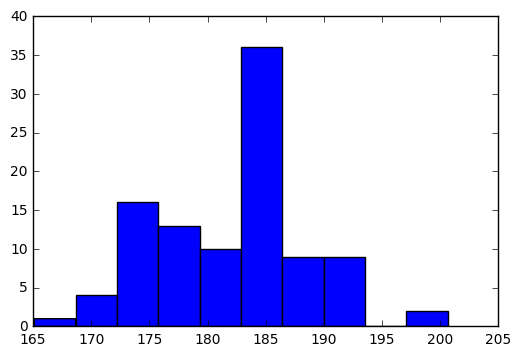

In [20]:
plt.hist(df.height)

(array([  7.,  13.,  21.,  24.,  17.,  11.,   3.,   2.,   0.,   2.]),
 array([ 139. ,  146.9,  154.8,  162.7,  170.6,  178.5,  186.4,  194.3,
         202.2,  210.1,  218. ]),
 <a list of 10 Patch objects>)

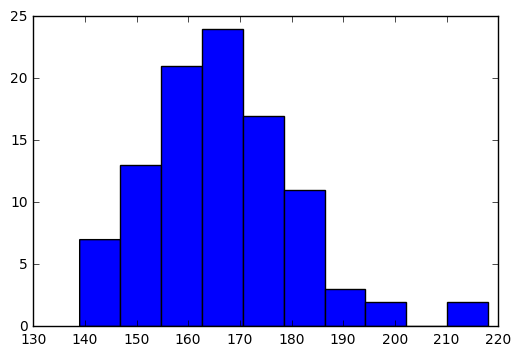

In [21]:
plt.hist(df.weight)